# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **weather phenomena** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **weather phenomena**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **weather phenomena**?  For this category you might want to consider seasonal changes, natural disasters, or historical trends.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

### Temperature in Michigan Ann, Arbor vs States/Provinces in Great Lakes Region

### 1. Region and Domain

#### State the region and the domain category that your data sets are about (e.g.,Chaohu, China and sports or athletics).
<br>
The region and domain category that the datasets are about are <b>Michigan, Ann Arbor</b> and <b>Weather Phenomena</b>

### 2. Research Question

#### Create a research question about the domain category and region that you identified

The question that is being trying to answered here is to<quote> Compare the <i>Mean Temperatures in Michigan, Ann Arbor</i> against the Mean High and Mean Low Temperatures in <i>States/Provinces of the Great Lakes Region</i> that include New York, Illinois, Pennsylvania, Ohio, Minnesota, Indiana and Wisconsin.<quote>

### 3.Links

#### Provide at least two links to publicly accessible datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.

The datasets that are used for this assignment are derived from the following publicly available data sources:
- World Climate Data (http://www.worldclimate.com/)
- National Weather Forecast Service Office (https://w2.weather.gov/climate/xmacis.php?wfo=dtx)

### 4.Code

#### Your code goes here. (Becoming an Independent Data Scientist)

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


<IPython.core.display.Javascript object>


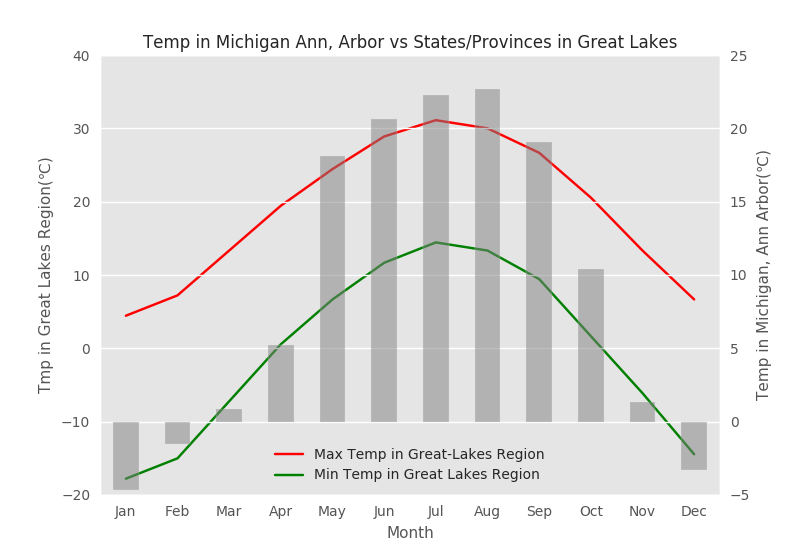

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib notebook
plt.style.use('seaborn-notebook')
 
#Read the Great-Lakes-Region Data from the Excel Sheet
xlsx = pd.ExcelFile("great_lakes_data.xlsx")
great_lakes = []
for sheet in xlsx.sheet_names:
    great_lakes.append(xlsx.parse(sheet))
#Concat the Avg Monthly Highs and Avg Monthly Lows from different Regions
great_lakes = pd.concat(great_lakes)
#Split the Great-Lakes-Region DataFrame based on Mean Highs and Mean Lows
great_lakes_high = great_lakes[great_lakes['Name'].str.contains('Average Monthly high in F:')]
great_lakes_low = great_lakes[great_lakes['Name'].str.contains('Average Monthly low in F:')]
#Drop the Unnecessary Columns from the Great Lakes Region
great_lakes_high.drop(great_lakes_high.columns[[0]], axis=1, inplace=True)
great_lakes_low.drop(great_lakes_low.columns[[0]], axis=1, inplace=True)
#Read the Michigan, Ann Arbor Data from the CSV File
michigan_annarbor = pd.read_csv("michigan_ann_arbor_data.csv", skiprows=2, parse_dates=True)
michigan_annarbor.drop(michigan_annarbor.columns[[0]], axis=1, inplace=True)
michigan_annarbor.drop(michigan_annarbor.columns[[-1]], axis=1, inplace=True)
michigan_annarbor = michigan_annarbor.iloc[0]
#Convert Farenheit to Celsius in degrees
def fahr_to_celsius(temp_fahr):
    """Convert Fahrenheit to Celsius
    Return Celsius conversion of input"""
    temp_celsius = (temp_fahr - 32) * 5 / 9
    return temp_celsius
#Apply the above Function to the following datasets
great_lakes_high = great_lakes_high.apply(fahr_to_celsius)
great_lakes_low = great_lakes_low.apply(fahr_to_celsius)
michigan_annarbor= michigan_annarbor.apply(fahr_to_celsius)
#Reset the Index and Find Max and Min Temp in Great Lakes Region
great_lakes_high = great_lakes_high.max()
great_lakes_low = great_lakes_low.min()
great_lakes_high = great_lakes_high.reset_index()
great_lakes_low = great_lakes_low.reset_index()
michigan_annarbor= michigan_annarbor.reset_index()
#Rename the Columns for the datasets
great_lakes_high.columns = ['Month', 'Max Temp']
great_lakes_low.columns = ['Month', 'Min Temp']
michigan_annarbor.columns= ['Month', 'MeanTemp']
michigan_annarbor["MeanTemp"] = pd.to_numeric(michigan_annarbor["MeanTemp"])
#Plot the Figure (Bar Chart and Line Graph)
fig, ax1 = plt.subplots()
ax2 = ax1.twinx()  
ax1.plot(range(len(great_lakes_high['Month'])), great_lakes_high['Max Temp'],'r', label = "Max Temp in Great-Lakes Region") 
ax1.plot(range(len(great_lakes_low['Month'])), great_lakes_low['Min Temp'],'g', label = "Min Temp in Great Lakes Region") 
michigan_annarbor['MeanTemp'].plot(kind='bar', color="gray", alpha=0.5)
#Set the Labels and Axis Titles
ax1.set_xlabel('Month')
ax1.set_ylabel('Tmp in Great Lakes Region(℃)')
ax2.set_ylabel('Temp in Michigan, Ann Arbor(℃)')
ax1.legend(loc='lower center', framealpha=0.5)
plt.title('Temp in Michigan Ann, Arbor vs States/Provinces in Great Lakes')
ax1.grid(False)
x = range(12)
x_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
plt.xticks(x, x_labels, rotation=45)
plt.savefig('Becoming Data Scientist.pdf', bbox_inches='tight')